Automaty komórkowe - modelowanie epidemii

Proszę zaimplementować model epidemii jako automat komórkowy https://mathworld.wolfram.com/CellularAutomaton.html 
Przykładowe modele to np. SIR lub SIS https://en.wikipedia.org/wiki/Epidemic_models_on_lattices  

Program powinien generować:

wizualizację modelu (animacja, film itp)
wykresy zmian populacji z czasie

Proszę zbadać działanie modelu dla różnych parametrów.

Program i wyniki proszę zaprezentować w postaci notatnika Jupyter i wgrać 2 pliki w fromatach

ipynb
html 

Dodatkowe linki:

Gra w życie https://mathworld.wolfram.com/GameofLife.html 
John Conway https://blogs.scientificamerican.com/observations/remembering-mathematical-magician-john-conway/ 
Stephen Wolfram - "Teoria wszystkiego" https://writings.stephenwolfram.com/2020/04/finally-we-may-have-a-path-to-the-fundamental-theory-of-physics-and-its-beautiful/ 
Stephen Wofram - A New Kind of Science https://www.wolframscience.com/nks/ 
Przykład i porównanie implementacji automatu komórkowego w Julii i w Pythonie https://grimmel.github.io/posts/2020/10/blog-post-1/ 
Animacje w Plots.js https://docs.juliaplots.org/latest/animations/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap, Normalize
%matplotlib notebook

In [2]:
SUSCEPTIBLE = 0
INFECTED = 1
REMOVED = 2

colors = ['lightgreen', 'red', 'black']
labels = ['Susceptible', 'Infected', 'Removed']

In [3]:
class Simulation():
    def __init__(self, size=50, ratio=0.1, infection_rate = 0.1, infected_remove_rate = 0.1):
        self.grid = np.zeros((size, size))
        self.infected_cells = set()
        self.day = 0
        self.size = size
        self.ratio = ratio
        self.infection_rate = infection_rate
        self.infected_remove_rate = infected_remove_rate

        for i in range(int(size * size * ratio)):
            x = np.random.choice(size)
            y = np.random.choice(size)
            self.grid[x, y] = INFECTED
            self.infected_cells.add((x, y))

        self.total_removed = 0
        self.total_infected = len(self.infected_cells)
        self.total_susceptible = self.size * self.size - self.total_infected - self.total_removed

        self.fig, self.ax = plt.subplots(1, 2, figsize=(9, 5))
        self.ax[1].clear()
        self.ax[1].axis('equal')
        self.piechart = self.ax[1].pie([self.total_susceptible, self.total_infected, self.total_removed], \
                                       colors=colors, autopct='%1.1f%%', shadow=True)
        day_str = f"Day = {self.day}"
        self.ax[1].set_title(day_str)

    def updatefig(self, z):
        self.day += 1
        new_infections = []
        for x, y in self.infected_cells:
            for i in range(-1, 2):
                for j in range(-1, 2):
                    xi = (x + i) % self.size
                    yj = (y + j) % self.size
                    if self.grid[xi, yj] == SUSCEPTIBLE and (i != 0 or j != 0) and np.random.random() < self.infection_rate:
                        new_infections.append((xi, yj))

        for x, y in new_infections:
            self.grid[x, y] = INFECTED
            self.infected_cells.add((x, y))

        to_remove = []
        for x, y in self.infected_cells:
            if np.random.random() < self.infected_remove_rate:
                self.grid[x, y] = REMOVED
                to_remove.append((x, y))

        for x, y in to_remove:
            self.infected_cells.remove((x, y))
            self.total_removed += 1

        self.im.set_array(self.grid)

        self.total_infected = len(self.infected_cells)
        self.total_susceptible = self.size * self.size - self.total_infected - self.total_removed
        day_str = f"Day = {self.day}"
        self.ax[1].clear()
        self.ax[1].axis('equal')
        self.ax[1].pie([self.total_susceptible, self.total_infected, self.total_removed], \
                       labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
        self.ax[1].set_title(day_str)
        self.fig.canvas.draw_idle()

        return self.im,

    def start(self):
        self.im = self.ax[0].imshow(self.grid, cmap=(ListedColormap(colors)), norm=Normalize(vmin=0, vmax=2),
                                    animated=True)
        self.ani = animation.FuncAnimation(self.fig, self.updatefig, blit=True)
        plt.show()

    def start_and_save(self):
        self.im = self.ax[0].imshow(self.grid, cmap=(ListedColormap(colors)), norm=Normalize(vmin=0, vmax=2),
                                    animated=True)
        self.ani = animation.FuncAnimation(self.fig, self.updatefig, blit=True)
        plt.show()
        self.ani.save('basic_animation.gif', fps=10) # as gif
        #self.ani.save('basic_animation.mp4', fps=10, extra_args=['-vcodec', 'libx264']) # as mp4

<IPython.core.display.Javascript object>


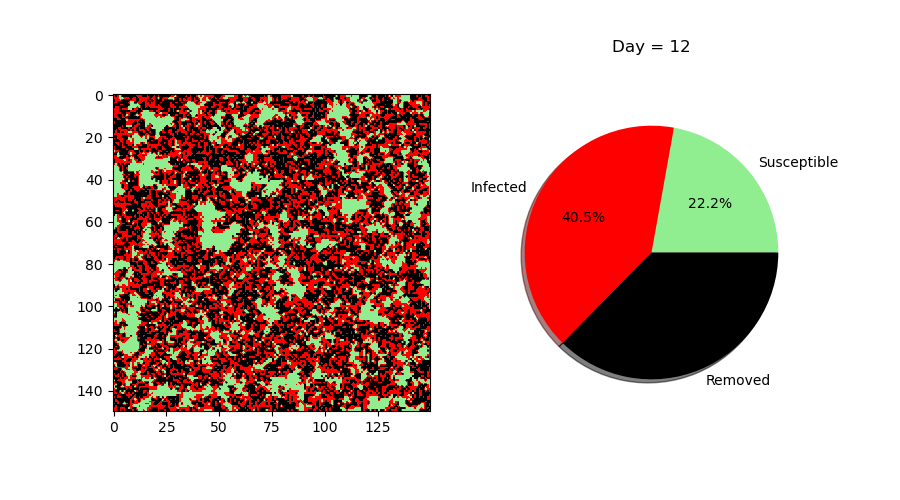

In [64]:
# ARGS: size, initial R:S ratio, infection rate, remove rate for infected
SIR = Simulation(150, 0.05)
SIR.start()

<IPython.core.display.Javascript object>


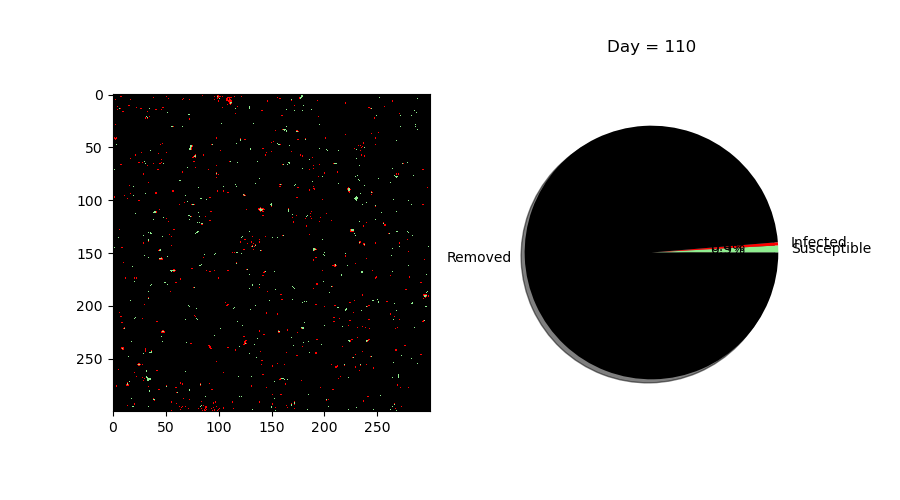

In [9]:
SIR = Simulation(300, 0.002, 0.1)
SIR.start_and_save()

<IPython.core.display.Javascript object>


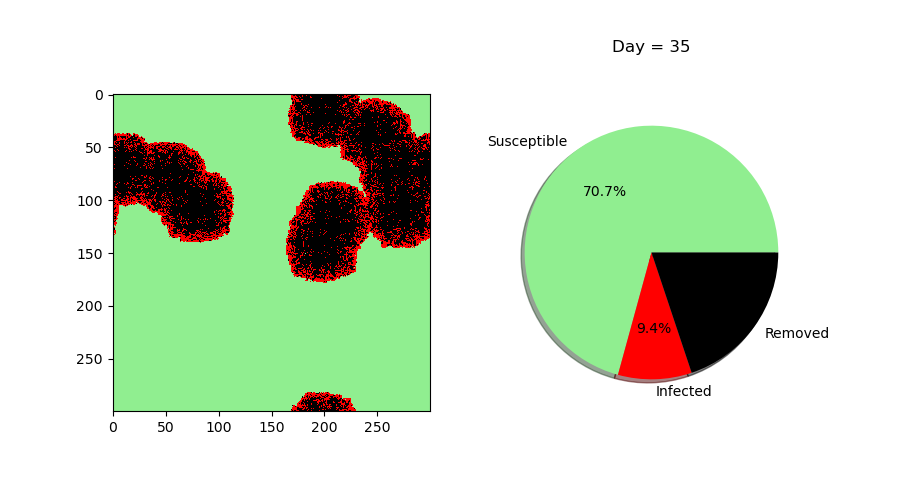

In [67]:
SIR = Simulation(300, 0.0001, 0.5)
SIR.start()

<IPython.core.display.Javascript object>


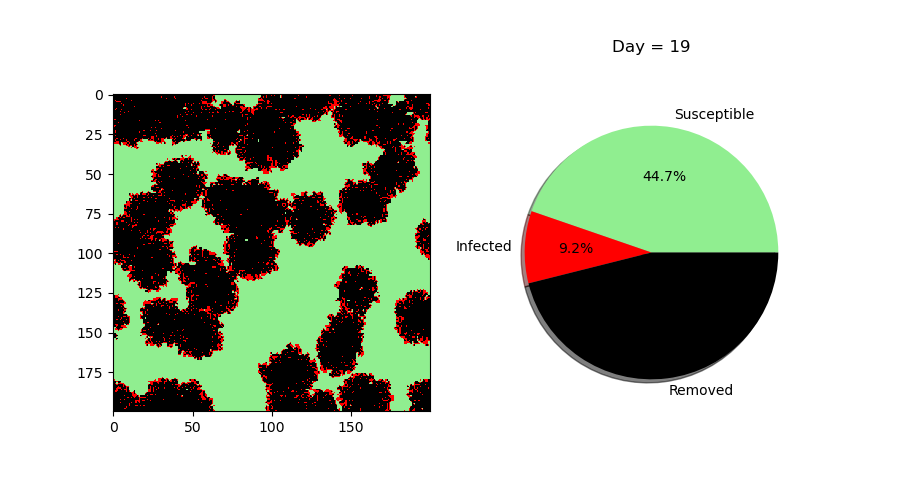

In [71]:
SIR = Simulation(200, 0.001, 0.5, 0.3)
SIR.start()

<IPython.core.display.Javascript object>


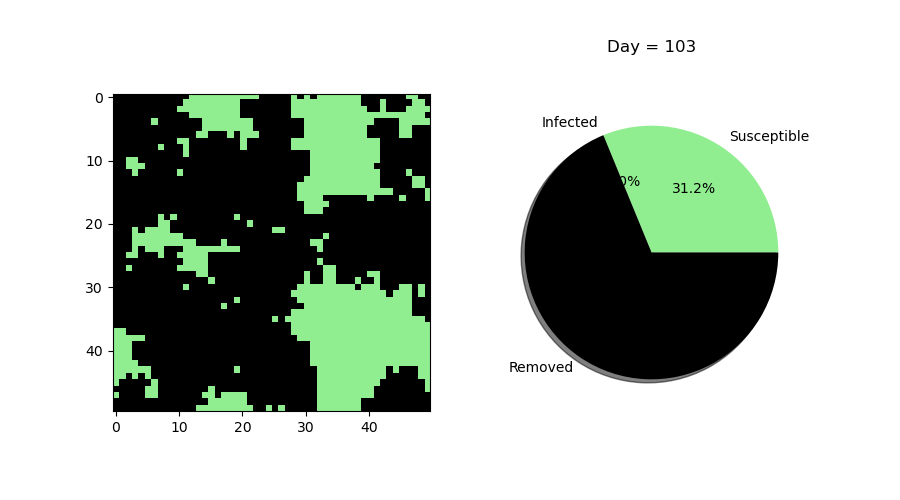

In [72]:
SIR = Simulation(50, 0.01, 0.5, 0.5)
SIR.start_and_save()